In [6]:
# Extra code voor aanvullende test die bekijken welke cyclische groepen voor de eerste 49 priemgetallen bestaan waarvoor alle 
# F_q primitive points double generators zijn.
import pandas as pd
from sympy import primerange

# Laad CSV-bestand
df = pd.read_csv("Alle cyclische groepen (1st 49 primes) waarvoor alle prim points double gen. zijn .csv")

# Zorg dat je de juiste kolom pakt (bijv. "q" of iets anders als dat de kolomnaam is)
eerste_kolom = df["q"].dropna().astype(int).unique().tolist()
# Genereer eerste 49 priemgetallen
eerste_49_priemen = list(primerange(2, 230))[:49]

# Bepaal welke priemgetallen ontbreken
ontbrekend = sorted(set(eerste_49_priemen) - set(eerste_kolom))

print("Ontbrekende priemgetallen:", ontbrekend)


Ontbrekende priemgetallen: [2, 23, 47, 59, 71, 83, 107, 109, 113, 131, 139, 149, 167, 179, 191, 199, 227]


In [10]:
# Deze code checkt voor alle eerste 25000 priemgetallen of de bound uit conjecture 3.5.6 waar is of niet. 
import pandas as pd

# Snelle functie voor square-free divisor count via aantal unieke priemfactoren
def square_free_divisor_count(n):
    if n <= 0:
        return 0
    return 2 ** len(n.factor())

# Genereer de eerste 25.000 priemgetallen, start vanaf q = 5
prime_list = list(prime_range(5, 300000))[:25000]

records = []
for q in prime_list:
    w1 = square_free_divisor_count(q - 1)
    w2 = square_free_divisor_count((q - 1) // 2)
    check = sqrt(q) > 4 * w1 * w2
    records.append({
        "q": int(q),
        "W(q-1)": w1,
        "W((q-1)/2)": w2,
        "Check": bool(check)
    })

# Exporteer naar Excel-bestand
df = pd.DataFrame(records)
df.to_excel("prime_check_25000_fast.xlsx", index=False)


In [12]:
#Deze code checkt of de condition uit conjecture 2.5.7 wordt voldaan voor de eerste 400 priemgetallen
from sage.all import *
import pandas as pd
import os
from datetime import datetime

def W(n):
    return len([d for d in divisors(n) if is_squarefree(d)])

# Eerste 200 priemgetallen, q > 2
primes = [p for p in primes_first_n(400) if p > 2]
resultaten = []

for q in primes:
    Fq = GF(q)
    W_q1 = W(q - 1)
    W_q1div2 = W((q - 1) // 2) if (q - 1) % 2 == 0 else 0

    for a in Fq:
        if a == 0:
            continue
        try:
            # y^2 = x^3 + ax (coëfficiëntenvorm [0, 0, 0, a, 0])
            E = EllipticCurve(Fq, [0, 0, 0, a, 0])
            N = E.cardinality()
            W_N = W(N)
            lhs = sqrt(q)
            rhs = 4 * W_q1 * W_q1div2 * W_N
            resultaat = bool(lhs > rhs)
            resultaten.append({
                "q": q,
                "a": int(a),
                "N": N,
                "W(q-1)": W_q1,
                "W((q-1)/2)": W_q1div2,
                "W(N)": W_N,
                "q^(1/2) > 4*W(q-1)*W((q-1)/2)*W(N)": resultaat
            })
        except Exception as e:
            print(f"⚠️ Fout bij q={q}, a={a}: {e}")
            continue

# Exportbestand naar bureaublad
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
bestandsnaam = f"elliptic_check_400_{timestamp}.csv"
pad = os.path.join(os.path.expanduser("~"), "Desktop", bestandsnaam)

df = pd.DataFrame(resultaten)
df.to_csv(pad, index=False)

print(f"✅ Bestand succesvol opgeslagen op bureaublad als: {bestandsnaam}")


✅ Bestand succesvol opgeslagen op bureaublad als: elliptic_check_400_20250522_115654.csv


In [ ]:
# Deze code test of er in de eerste 50 priemwaarden q ook q's zijn waarvoor voor elke a er een double generator is.
import pandas as pd

# Laad het Excel-bestand
df = pd.read_excel("Altijd_double_point.xlsx")

# Controleer per q of bij elke a de kolom 'double_points' niet leeg of '-' is
# We nemen aan dat '-' betekent: geen double point

per_q = df.groupby("q").apply(lambda group: all(group["double_points"] != "-"))

# Selecteer alleen de q's waar dit voor geldt
allemaal_double = per_q[per_q].index.tolist()

print(f"✅ Aantal priemgetallen waarvoor elke a minstens één double point oplevert: {len(allemaal_double)}")
print("Deze priemgetallen zijn:", allemaal_double)

In [14]:
# Deze code test of er in de tweede 50 priemwaarden q ook q's zijn waarvoor voor elke a er een double generator is.
import pandas as pd

# Laad het Excel-bestand
df = pd.read_excel("Altijd_double_point_2th.xlsx")

# Controleer per q of bij elke a de kolom 'double_points' niet leeg of '-' is
# We nemen aan dat '-' betekent: geen double point

per_q = df.groupby("q").apply(lambda group: all(group["double_points"] != "-"))

# Selecteer alleen de q's waar dit voor geldt
allemaal_double = per_q[per_q].index.tolist()

print(f"✅ Aantal priemgetallen waarvoor elke a minstens één double point oplevert: {len(allemaal_double)}")
print("Deze priemgetallen zijn:", allemaal_double)


✅ Aantal priemgetallen waarvoor elke a minstens één double point oplevert: 0
Deze priemgetallen zijn: []


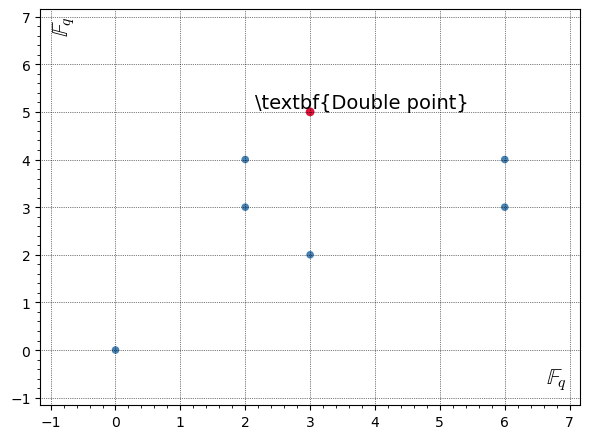

In [15]:
# Extra code om plaatje te maken, nog niet gebruikt.
# Definieer de punten
punten = [(0, 0), (2, 3), (2, 4), (3, 2), (3, 5), (6, 3), (6, 4)]

# Plot alle punten behalve de double point
gewone_punten = [p for p in punten if p != (3, 5)]
plot_gewone = sum([point(p, size=30, color='steelblue') for p in gewone_punten])

# Plot het speciale punt (3,5) in een contrasterende kleur
plot_special = point((3, 5), size=40, color='crimson')

# Annotatie bij het speciale punt
annotatie = text(r"\textbf{Double point}", (3.8, 5.2), fontsize=14, color='black')

# Assenlabels verder van het midden en in mooie stijl
assenlabels = (
    text(r"$\mathbb{F}_q$", (6.8, -0.6), fontsize=16, color='black') +
    text(r"$\mathbb{F}_q$", (-0.8, 6.8), rotation=90, fontsize=16, color='black')
)

# Combineer alles
plot = plot_gewone + plot_special + annotatie + assenlabels
plot.axes(False)  # Geen numerieke assen
plot.set_axes_range(xmin=-1, xmax=7, ymin=-1, ymax=7)
plot.show(gridlines=True, frame=True, figsize=6)
